----------------------------------------------------------------------------------------------------
                                  Reading and Structuring Dataset                                  
----------------------------------------------------------------------------------------------------
Dataset Shape: (4898, 12)
Missing values: 0
Duplicated values: 937
+----------------------+-----------+
|     Column Name      | Data Type |
+----------------------+-----------+
|    fixed acidity     |  float64  |
|   volatile acidity   |  float64  |
|     citric acid      |  float64  |
|    residual sugar    |  float64  |
|      chlorides       |  float64  |
| free sulfur dioxide  |  float64  |
| total sulfur dioxide |  float64  |
|       density        |  float64  |
|          pH          |  float64  |
|      sulphates       |  float64  |
|       alcohol        |  float64  |
|       quality        |   int64   |
+----------------------+-----------+
+----------------------+--------+------

Processing Random Forest CV: 10it [00:04,  2.14it/s]


Completed Random Forest Classifier Execution
----------------------------------------------------------------------------------------------------
                                     Support Vector Classifier                                     
----------------------------------------------------------------------------------------------------


Processing SVC CV: 10it [00:40,  4.06s/it]


Completed Support Vector Classifier Execution
----------------------------------------------------------------------------------------------------
                                    Convolutional Neural Network                                    
----------------------------------------------------------------------------------------------------


Processing CNN CV: 0it [00:00, ?it/s]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Processing CNN CV: 1it [00:05,  5.46s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Processing CNN CV: 2it [00:11,  5.66s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Processing CNN CV: 3it [00:15,  5.12s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Processing CNN CV: 4it [00:24,  6.44s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Processing CNN CV: 5it [00:30,  6.46s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Processing CNN CV: 6it [00:36,  6.35s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Processing CNN CV: 7it [00:42,  5.99s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Processing CNN CV: 8it [00:48,  6.23s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Processing CNN CV: 9it [00:54,  5.93s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Processing CNN CV: 10it [00:59,  5.92s/it]

Completed Convolutional Neural Network Execution

Performance Metrics for Random Forest Classifier
+------------+--------+
|   Metric   | Value  |
+------------+--------+
|     P      |  313   |
|     N      |  176   |
|     TP     |  276   |
|     TN     |  108   |
|     FP     |   68   |
|     FN     |   37   |
|    TPR     | 0.8818 |
|    TNR     | 0.6136 |
|    FPR     | 0.3864 |
|    FNR     | 0.1182 |
| Precision  | 0.8023 |
|     F1     | 0.8402 |
|  Accuracy  | 0.7853 |
| Error Rate | 0.2147 |
|    BACC    | 0.7477 |
|    TSS     | 0.4954 |
|    HSS     |  0.52  |
+------------+--------+

Performance Metrics for Support Vector Classifier
+------------+--------+
|   Metric   | Value  |
+------------+--------+
|     P      |  313   |
|     N      |  176   |
|     TP     |  274   |
|     TN     |  110   |
|     FP     |   66   |
|     FN     |   39   |
|    TPR     | 0.8754 |
|    TNR     | 0.625  |
|    FPR     | 0.375  |
|    FNR     | 0.1246 |
| Precision  | 0.8059 |
|     F1  

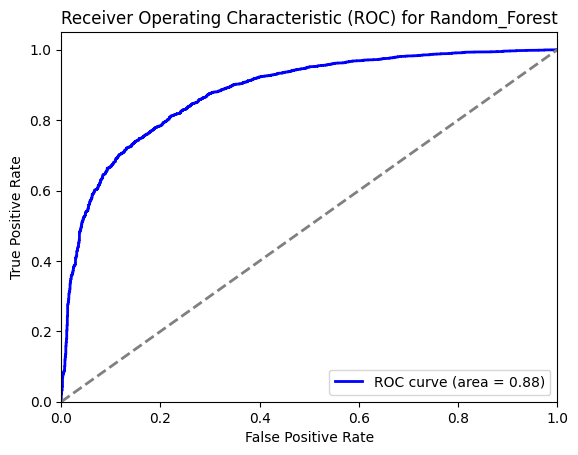

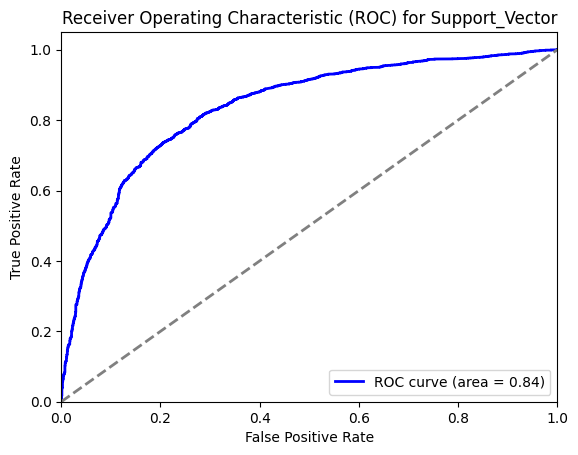

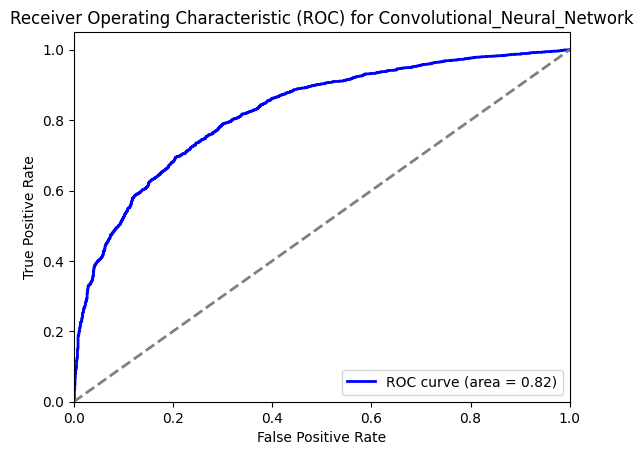

----------------------------------------------------------------------------------------------------
                                        The Best Classifier                                        
----------------------------------------------------------------------------------------------------
 >> | Random Forest Classifier Accuracy: 0.7852760736196319 | << 
 >> | Support Vector Classifier Accuracy: 0.7852760736196319 | << 
 >> | Convolutional Neural Network Classifier Accuracy: 0.7586912065439673 | << 
--------------------------------------------------------------------------------
         Convolutional Neural Network Classifier is the Best Classifier         
--------------------------------------------------------------------------------


In [43]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from prettytable import PrettyTable
from warnings import filterwarnings
from keras.models import Sequential
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

filterwarnings("ignore")


class Utilities:
    def __init__(self, lines_count=100) -> None:
        self.lines = lines_count

    def __center_aligned_formatter(self, text: str) -> str:
        formatter = int((self.lines - len(text)) / 2)
        return " " * formatter + text + " " * formatter

    def program_header(self, text: str) -> None:
        print(self.lines_formatter())
        print(self.__center_aligned_formatter(text=text))
        print(self.lines_formatter())
        return

    def lines_formatter(self) -> str:
        return "-" * self.lines


class ReadingDataset:
    def __init__(self, file_path: str) -> None:
        self.file_path = file_path
        self.util = Utilities(lines_count=100)

    def __read_dataset(self) -> pd.DataFrame:
        wine_df = pd.read_csv(self.file_path, sep=";")
        return wine_df

    def __encode_categorical_features(self, wine_df: pd.DataFrame) -> pd.DataFrame:
        # Converting 'quality' into binary classification: Good (1) vs Bad (0)
        wine_df["quality"] = wine_df["quality"].apply(lambda x: 1 if x >= 6 else 0)

        print(f"Dataset Shape: {wine_df.shape}")
        print(f"Missing values: {wine_df.isna().sum().sum()}")
        print(f"Duplicated values: {wine_df.duplicated().sum()}")

        pretty_table = PrettyTable()
        pretty_table.field_names = ["Column Name", "Data Type"]
        for col in wine_df.columns:
            pretty_table.add_row([col, wine_df[col].dtype])
        print(pretty_table)

        df_describe = wine_df.describe().T
        pretty_table = PrettyTable(field_names=["Stat"] + df_describe.columns.tolist())
        for idx, row in df_describe.iterrows():
            pretty_table.add_row([idx] + row.round(2).tolist())
        print(pretty_table)

        return wine_df

    def structured_dataset(self) -> pd.DataFrame:
        self.util.program_header(text="Reading and Structuring Dataset")
        wine_df = self.__read_dataset()
        wine_df = self.__encode_categorical_features(wine_df=wine_df)
        return wine_df


class ImplementingDifferentClassificationModels:
    def __init__(self, wine_df: pd.DataFrame) -> None:
        self.X, self.y = wine_df.iloc[:, :-1], wine_df.iloc[:, -1]
        self.kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
        self.util = Utilities(lines_count=100)
        self.util.program_header(text="Classification Models Implementation")

    def __calculate_performance_metrics(self, cm: np.ndarray):
        """Calculates detailed performance metrics from a confusion matrix."""
        TN, FP, FN, TP = cm.ravel()
        P = TP + FN
        N = TN + FP
        TPR = TP / P if P != 0 else 0  # Sensitivity/Recall
        TNR = TN / N if N != 0 else 0  # Specificity
        FPR = FP / N if N != 0 else 0
        FNR = FN / P if P != 0 else 0
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        F1 = 2 * (precision * TPR) / (precision + TPR) if precision + TPR != 0 else 0
        accuracy = (TP + TN) / (P + N) if P + N != 0 else 0
        error_rate = 1 - accuracy
        BACC = (TPR + TNR) / 2
        TSS = TPR - FPR
        HSS = (2 * (TP * TN - FP * FN)) / ((P * N) + ((TP + FP) * (TN + FN))) if (P * N) + ((TP + FP) * (TN + FN)) != 0 else 0

        return {
            "P": P, "N": N, "TP": TP, "TN": TN, "FP": FP, "FN": FN,
            "TPR": TPR, "TNR": TNR, "FPR": FPR, "FNR": FNR,
            "Precision": precision, "F1": F1, "Accuracy": accuracy,
            "Error Rate": error_rate, "BACC": BACC, "TSS": TSS, "HSS": HSS
        }

    def __random_forest_classifier(self):
        """Implements Random Forest classifier with cross-validation."""
        self.util.program_header("Random Forest Classifier")
        rf_metrics = []
        all_true_labels = []
        all_pred_probs = []

        rf_model = RandomForestClassifier(n_estimators=25, max_depth=10, random_state=42)
        for train_idx, test_idx in tqdm(self.kfold_cv.split(self.X), desc="Processing Random Forest CV"):
            rf_model.fit(self.X.iloc[train_idx], self.y.iloc[train_idx])
            y_pred = rf_model.predict(self.X.iloc[test_idx])
            y_pred_proba = rf_model.predict_proba(self.X.iloc[test_idx])[:, 1]

            cm = confusion_matrix(self.y.iloc[test_idx], y_pred)
            rf_metrics.append(self.__calculate_performance_metrics(cm))

            all_true_labels.extend(self.y.iloc[test_idx])
            all_pred_probs.extend(y_pred_proba)

        print("Completed Random Forest Classifier Execution")
        return rf_metrics, all_true_labels, all_pred_probs

    def __support_vector_classifier(self):
        """Implements Support Vector Classifier with cross-validation."""
        self.util.program_header("Support Vector Classifier")
        svc_metrics = []
        all_true_labels = []
        all_pred_probs = []

        svc_model = SVC(kernel="rbf", probability=True, random_state=42)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(self.X)

        for train_idx, test_idx in tqdm(self.kfold_cv.split(X_scaled), desc="Processing SVC CV"):
            svc_model.fit(X_scaled[train_idx], self.y.iloc[train_idx])
            y_pred = svc_model.predict(X_scaled[test_idx])
            y_pred_proba = svc_model.predict_proba(X_scaled[test_idx])[:, 1]

            cm = confusion_matrix(self.y.iloc[test_idx], y_pred)
            svc_metrics.append(self.__calculate_performance_metrics(cm))

            all_true_labels.extend(self.y.iloc[test_idx])
            all_pred_probs.extend(y_pred_proba)

        print("Completed Support Vector Classifier Execution")
        return svc_metrics, all_true_labels, all_pred_probs

    def __convolutional_neural_network(self):
        """Implements Convolutional Neural Network with cross-validation."""
        self.util.program_header("Convolutional Neural Network")
        cnn_metrics = []
        all_true_labels = []
        all_pred_probs = []

        for train_idx, test_idx in tqdm(self.kfold_cv.split(self.X), desc="Processing CNN CV"):
            scaler = StandardScaler()
            X_train = scaler.fit_transform(self.X.iloc[train_idx])
            X_test = scaler.transform(self.X.iloc[test_idx])

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Sequential([
                Conv1D(64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
                MaxPooling1D(pool_size=2),
                Flatten(),
                Dense(64, activation="relu"),
                Dropout(0.2),
                Dense(1, activation="sigmoid")
            ])
            model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])
            model.fit(X_train, self.y.iloc[train_idx], epochs=10, batch_size=32, verbose=0)

            y_pred_probs = model.predict(X_test).flatten()
            y_pred = (y_pred_probs > 0.5).astype(int)

            cm = confusion_matrix(self.y.iloc[test_idx], y_pred)
            cnn_metrics.append(self.__calculate_performance_metrics(cm))

            all_true_labels.extend(self.y.iloc[test_idx])
            all_pred_probs.extend(y_pred_probs)

        print("Completed Convolutional Neural Network Execution")
        return cnn_metrics, all_true_labels, all_pred_probs

    def develop_classifiers(self):
        """Develops all classifiers and returns their metrics and results."""
        rf_metrics, rf_true, rf_probs = self.__random_forest_classifier()
        svc_metrics, svc_true, svc_probs = self.__support_vector_classifier()
        cnn_metrics, cnn_true, cnn_probs = self.__convolutional_neural_network()

        return {
            "Random Forest": (rf_metrics, rf_true, rf_probs),
            "Support Vector Classifier": (svc_metrics, svc_true, svc_probs),
            "Convolutional Neural Network": (cnn_metrics, cnn_true, cnn_probs)
        }


class PlotROCCurve:
    def develop_curve(self, all_true_labels: list, all_predicted_probabilities: list, model_name: str):
        """Plots the ROC curve for a given model."""
        fpr, tpr, _ = roc_curve(all_true_labels, all_predicted_probabilities)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Receiver Operating Characteristic (ROC) for {model_name}")
        plt.legend(loc="lower right")
        plt.show()


class DisplayingPerformanceMetrics:
    def display_performance_metrics(self, random_forest_terms, support_vector_classifier_terms, convolutional_neural_network_terms):
        """Displays performance metrics for each classifier."""
        print("\nPerformance Metrics for Random Forest Classifier")
        self.__display_metrics(random_forest_terms)

        print("\nPerformance Metrics for Support Vector Classifier")
        self.__display_metrics(support_vector_classifier_terms)

        print("\nPerformance Metrics for Convolutional Neural Network Classifier")
        self.__display_metrics(convolutional_neural_network_terms)

    def __display_metrics(self, classifier_terms):
        """Helper method to display metrics for a given classifier."""
        headers = ["Metric", "Value"]
        table = PrettyTable(headers)
        for term, value in classifier_terms[-1].items():
            table.add_row([term, round(value, 4)])
        print(table)


if __name__ == "__main__":
    dataset_path = "winequality-white.csv"  # Update with your dataset path
    rd = ReadingDataset(file_path=dataset_path)
    wine_df = rd.structured_dataset()

    idcm = ImplementingDifferentClassificationModels(wine_df=wine_df)

    # Develop classifiers
    classifiers = idcm.develop_classifiers()
    random_forest_terms, all_true_labels_for_random_forest_classifier, all_predicted_probabilities_for_random_forest_classifier = classifiers["Random Forest"]
    support_vector_classifier_terms, all_true_labels_for_support_vector_classifier, all_predicted_probabilities_for_support_vector_classifier = classifiers["Support Vector Classifier"]
    convolutional_neural_network_terms, all_true_labels_for_convolutional_neural_network, all_predicted_probabilities_for_convolutional_neural_network = classifiers["Convolutional Neural Network"]

    DisplayingPerformanceMetrics().display_performance_metrics(
        random_forest_terms=random_forest_terms,
        support_vector_classifier_terms=support_vector_classifier_terms,
        convolutional_neural_network_terms=convolutional_neural_network_terms,
    )

    # Plot ROC curves for each classifier
    PlotROCCurve().develop_curve(
        all_true_labels=all_true_labels_for_random_forest_classifier,
        all_predicted_probabilities=all_predicted_probabilities_for_random_forest_classifier,
        model_name="Random_Forest"
    )

    PlotROCCurve().develop_curve(
        all_true_labels=all_true_labels_for_support_vector_classifier,
        all_predicted_probabilities=all_predicted_probabilities_for_support_vector_classifier,
        model_name="Support_Vector"
    )

    PlotROCCurve().develop_curve(
        all_true_labels=all_true_labels_for_convolutional_neural_network,
        all_predicted_probabilities=all_predicted_probabilities_for_convolutional_neural_network,
        model_name="Convolutional_Neural_Network"
    )

    # Determine and display the best classifier
    Utilities().program_header(text="The Best Classifier")
    random_forest_accuracy = random_forest_terms[-1]["Accuracy"]
    support_vector_accuracy = support_vector_classifier_terms[-1]["Accuracy"]
    convolutional_neural_network_accuracy = convolutional_neural_network_terms[-1]["Accuracy"]

    print(f" >> | Random Forest Classifier Accuracy: {random_forest_accuracy} | << ")
    print(f" >> | Support Vector Classifier Accuracy: {support_vector_accuracy} | << ")
    print(f" >> | Convolutional Neural Network Classifier Accuracy: {convolutional_neural_network_accuracy} | << ")

    if random_forest_accuracy > support_vector_accuracy and random_forest_accuracy > convolutional_neural_network_accuracy:
        Utilities(lines_count=80).program_header(text="Random Forest Classifier is the Best Classifier")
    elif support_vector_accuracy > random_forest_accuracy and support_vector_accuracy > convolutional_neural_network_accuracy:
        Utilities(lines_count=80).program_header(text="Support Vector Classifier is the Best Classifier")
    else:
        Utilities(lines_count=80).program_header(text="Convolutional Neural Network Classifier is the Best Classifier")
